# Data Analysis of HDB Flats in Singapore


Name: Jovian Sanjaya Putra
    
Admin Number: 2233570
    
Module Class: EP0302FT04

# Overview 

I am an international student who studies in Polytechnic and decides to take tuition grant. Upon my graduation, I need to work for 3 years in Singapore to fulfill my bond. I am trying to look for a place to stay in the long run for about 10 years but there are some factors that I am confused about.

Firstly, I am looking a flat that is 'value for money' which means that flats have lots of amenities at a reasonable price with decent and strategic location which means easy to go anywhere.

Secondly, I am planning to move in in January 2024 with my brother. So i am hoping to have the right amount of room for us to stay. 

Thirdly, I am confused whether to buy or rent

 Help me to decide whether should i buy or rent , the location, and the flat type!

# Outline

Graph 1 : How has average of the median rent and resale price changed over the years? (Line Chart)

Graph 2 :  Average amenities per block in each town (Bar Chart)

Graph 3 : Resale Price vs Remaining Lease Year Over Four Years(Scatter plot)

Graph 4 : Comparison of total price after 10 years, Buying vs Renting (Bar Graph and line chart)

Graph 5 : Distribution of median rent prices across different towns in 2023 (boxplot)

Graph 6 : Distribution of dwelling units by sold/rental and flat types in central area and sembawang in 2021 (Pie Chart)

# Map Distribution of HDB Flats

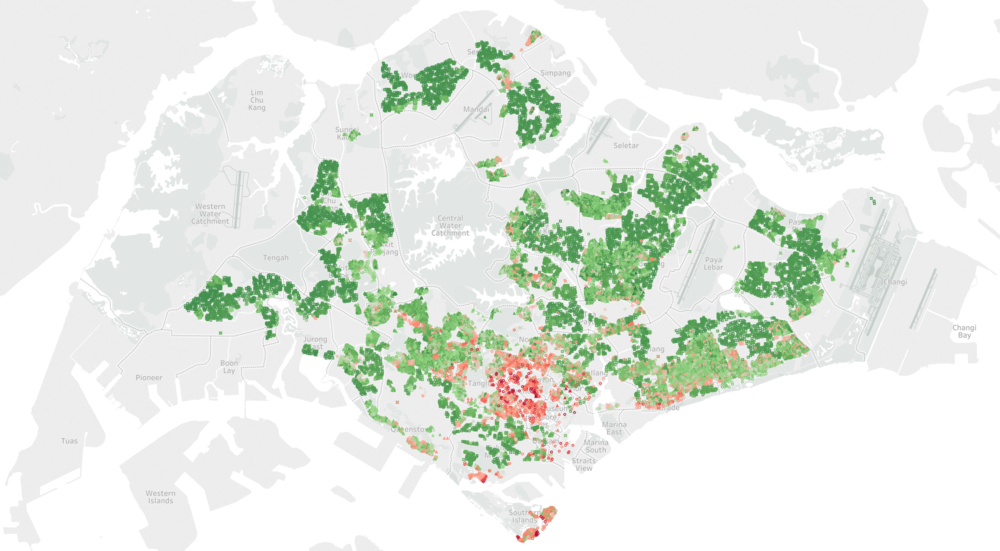

In [77]:
from IPython.display import Image

image_path = 'hdb.png'

Image(image_path)

# Libraries

In [78]:
#Importing libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
from scipy.stats import pearsonr


# Use Dark Background

In [79]:
plt.style.use('dark_background')

# Data Set 1

Data set 1 provides the number of dwelling unit in different town or state from  2008 to 2021. 

It also shows whether the unit is sold or being rented , town , and flat type. 

In [96]:
#https://beta.data.gov.sg/collections/165/view

#Reading File from csv and providing info
file = 'DwellingUnitsunderHDBsManagementbyTownandFlatType.csv'
dwelling = pd.read_csv(file,sep = ',')

#Showing info
dwelling.info()

#Dataframe
dwelling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   financial_year        4940 non-null   int64 
 1   town_or_estate        4940 non-null   object
 2   flat_type             4940 non-null   object
 3   sold_or_rental        4940 non-null   object
 4   no_of_dwelling_units  4940 non-null   object
dtypes: int64(1), object(4)
memory usage: 193.1+ KB


,financial_year,town_or_estate,flat_type,sold_or_rental,no_of_dwelling_units
0,2008,Ang Mo Kio,1-room,Rental Units,1318
1,2008,Ang Mo Kio,1-room,Sold Units,0
2,2008,Ang Mo Kio,2-room,Rental Units,2860
3,2008,Ang Mo Kio,2-room,Sold Units,633
4,2008,Ang Mo Kio,3-room,Rental Units,62
...,...,...,...,...,...
4935,2021,Yishun,5-room,Rental Units,0
4936,2021,Yishun,5-room,Sold Units,10521
4937,2021,Yishun,Executive,Sold Units,2741
4938,2021,Yishun,Studio Apartment,Rental Units,-


In [97]:
#Total rows and columns
print(f'There are total {len(dwelling)} rows and {len(dwelling.columns)} columns in dataset DwellingUnitsunderHDBsManagementbyTownandFlatType.csv ','\n')

# Get the total number of distinct towns
unique_towns = dwelling['town_or_estate'].nunique()
print("Total number of distinct towns:", unique_towns,'\n')

# Get the total number of distinct flat types
unique_flat_types = dwelling['flat_type'].unique()
no_unique_flat_types = dwelling['flat_type'].nunique()
print(f"Total number of distinct flat types: {no_unique_flat_types} which is {unique_flat_types}")

There are total 4940 rows and 5 columns in dataset DwellingUnitsunderHDBsManagementbyTownandFlatType.csv  

Total number of distinct towns: 27 

Total number of distinct flat types: 8 which is ['1-room' '2-room' '3-room' '4-room' '5-room' 'Executive'
 'Studio Apartment' 'HUDC']


# Data Set 2 

Data set 2 provides the median rent price of different flat types from 2005 to 2023.

 We will only use data from 2013 to 2023 for line chart later on to see the broader trends.

 We will use data in 2023 for boxplots.

Since the file contains "na" and "-" and they are still string, hence we need to clean by replacing with 0 and convert it to int.

In addition in quarter column there's Q beside the year and they are still string data type, therefore we need to clean the dataset and convert it to int.

In [82]:
#https://beta.data.gov.sg/collections/156/view

#Reading File from csv and providing info
file = 'MedianRentByTownAndFlatType.csv'
rent = pd.read_csv(file,sep = ',')

# Convert the 'Median_Rent' column to numeric (set errors='coerce' to handle non-numeric values)
rent['median_rent'] = pd.to_numeric(rent['median_rent'], errors='coerce')

# Remove quarter information from the 'Quarter' column
rent['quarter'] = rent['quarter'].str.extract(r'(\d{4})-')[0]

# Replace NaN values with 0 and handle non-numeric values by setting them to 0
rent['median_rent'] = rent['median_rent'].fillna(0).astype(int)

#Showing info
rent.info()

#Dataframe
rent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11277 entries, 0 to 11276
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quarter      11277 non-null  object
 1   town         11277 non-null  object
 2   flat_type    11277 non-null  object
 3   median_rent  11277 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 308.5+ KB


,quarter,town,flat_type,median_rent
0,2005,ANG MO KIO,1-RM,0
1,2005,ANG MO KIO,2-RM,0
2,2005,ANG MO KIO,3-RM,800
3,2005,ANG MO KIO,4-RM,950
4,2005,ANG MO KIO,5-RM,0
...,...,...,...,...
11272,2023,YISHUN,2-RM,0
11273,2023,YISHUN,3-RM,2500
11274,2023,YISHUN,4-RM,3000
11275,2023,YISHUN,5-RM,3200


In [83]:
#Total rows and columns
print(f'There are total {len(rent)} rows and {len(rent.columns)} columns in dataset hdbrent.csv','\n')

# Get the total number of distinct towns
unique_towns = rent['town'].nunique()
print("Total number of distinct towns:", unique_towns,'\n')

# Get the total number of distinct flat types
unique_flat_types = rent['flat_type'].unique()
no_unique_flat_types = rent['flat_type'].nunique()
print(f"Total number of distinct flat types: {no_unique_flat_types} which is {unique_flat_types}")

There are total 11277 rows and 4 columns in dataset hdbrent.csv 

Total number of distinct towns: 53 

Total number of distinct flat types: 6 which is ['1-RM' '2-RM' '3-RM' '4-RM' '5-RM' 'EXEC']


# Data Set 3

Data set 3 provides the resale flat prices based on registration date from 2017 to 2024. 

It also shows some information about the flat like remaining lease year , flat type, and floor area. 

In [84]:
#https://beta.data.gov.sg/collections/189/view
#Reading File from csv and providing info
file = 'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv'
resale = pd.read_csv(file,sep = ',')

#Showing info
resale.info()

#Dataframe
resale

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170233 entries, 0 to 170232
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                170233 non-null  object 
 1   town                 170233 non-null  object 
 2   flat_type            170233 non-null  object 
 3   block                170233 non-null  object 
 4   street_name          170233 non-null  object 
 5   storey_range         170233 non-null  object 
 6   floor_area_sqm       170233 non-null  float64
 7   flat_model           170233 non-null  object 
 8   lease_commence_date  170233 non-null  int64  
 9   remaining_lease      170233 non-null  object 
 10  resale_price         170233 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 14.3+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
170228,2024-01,YISHUN,5 ROOM,505C,YISHUN ST 51,04 TO 06,112.0,Improved,2016,91 years 03 months,640000.0
170229,2024-01,YISHUN,5 ROOM,513C,YISHUN ST 51,07 TO 09,113.0,Improved,2018,93 years 03 months,675000.0
170230,2024-01,YISHUN,5 ROOM,504B,YISHUN ST 51,07 TO 09,113.0,Improved,2016,91 years 03 months,723000.0
170231,2024-01,YISHUN,5 ROOM,602,YISHUN ST 61,07 TO 09,121.0,Improved,1987,62 years 05 months,688000.0


In [85]:
#Total rows and columns
print(f'There are total {len(resale)} rows and {len(resale.columns)} columns in dataset ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv','\n')\

# Get the total number of distinct towns
unique_towns = resale['town'].nunique()
print("Total number of distinct towns:", unique_towns,'\n')

# Get the total number of distinct flat types
unique_flat_types = resale['flat_type'].unique()
no_unique_flat_types = resale['flat_type'].nunique()
print(f"Total number of distinct flat types: {no_unique_flat_types} which is {unique_flat_types}")

There are total 170233 rows and 11 columns in dataset ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv 

Total number of distinct towns: 26 

Total number of distinct flat types: 7 which is ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']


# Data Set 4

This data set shows the different amounts of amenities around different blocks of flats

The data is not very useful now because the town names are in abbreviated form, making it hard to compare with the other dataset which towns are full.

Hence I had to clean the data to colate all of the different amenities into 1 data as well as to change the town names from abbreviations to full forms.

In [86]:
#https://beta.data.gov.sg/collections/150/view
#Reading File from csv and providing info
file = 'HDBPropertyInformation.csv'
info = pd.read_csv(file,sep = ',')

#Showing info
info.info()

#Dataframe
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12826 entries, 0 to 12825
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   blk_no                 12826 non-null  object
 1   street                 12826 non-null  object
 2   max_floor_lvl          12826 non-null  int64 
 3   year_completed         12826 non-null  int64 
 4   residential            12826 non-null  object
 5   commercial             12826 non-null  object
 6   market_hawker          12826 non-null  object
 7   miscellaneous          12826 non-null  object
 8   multistorey_carpark    12826 non-null  object
 9   precinct_pavilion      12826 non-null  object
 10  bldg_contract_town     12826 non-null  object
 11  total_dwelling_units   12826 non-null  int64 
 12  1room_sold             12826 non-null  int64 
 13  2room_sold             12826 non-null  int64 
 14  3room_sold             12826 non-null  int64 
 15  4room_sold         

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,54,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,998A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,33,50,0,0,0,0,0,0,0,0
12822,998B,BUANGKOK CRES,17,2018,Y,N,N,N,N,N,...,31,47,0,0,0,0,0,0,0,0
12823,999,BUANGKOK CRES,2,2018,N,N,N,Y,N,Y,...,0,0,0,0,0,0,0,0,0,0
12824,999A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,136,170,0,0


In [87]:
#Total rows and columns
print(f"There are {len(info)} rows and {len(info.columns)} columns in this dataset.\n")

#Names of columns
print(f"The column names of the data are {list(info.columns)}\n")

#Total towns
print(f"This data set covers {info['bldg_contract_town'].nunique()} different towns of Singapore. \n")


There are 12826 rows and 24 columns in this dataset.

The column names of the data are ['blk_no', 'street', 'max_floor_lvl', 'year_completed', 'residential', 'commercial', 'market_hawker', 'miscellaneous', 'multistorey_carpark', 'precinct_pavilion', 'bldg_contract_town', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']

This data set covers 27 different towns of Singapore. 



In [88]:
# Dictionary for town names
town = {
    "AMK": "ANG MO KIO",
    "BB": "BUKIT BATOK",
    "BD": "BEDOK",
    "BH": "BISHAN",
    "BM": "BUKIT MERAH",
    "BP": "BUKIT PANJANG",
    "BT": "BUKIT TIMAH",
    "CCK": "CHOA CHU KANG",
    "CL": "CLEMENTI",
    "CT": "CENTRAL AREA",
    "GL": "GEYLANG",
    "HG": "HOUGANG",
    "JE": "JURONG EAST",
    "JW": "JURONG WEST",
    "KWN": "KALLANG/WHAMPOA",
    "MP": "MARINE PARADE",
    "PG": "PUNGGOL",
    "PRC": "PASIR RIS",
    "QT": "QUEENSTOWN",
    "SB": "SEMBAWANG",
    "SGN": "SERANGOON",
    "SK": "SENGKANG",
    "TAP": "TAMPINES",
    "TG": "TENGAH",
    "TP": "TOA PAYOH",
    "WL": "WOODLANDS",
    "YS": "YISHUN",
}

# Create lists to store amenities count and town information
amenities = []
town_names = []

# Create lists to calculate average amenities per town
avg = [0] * len(town)
count = [0] * len(town)


# Iterating through info
for i in range(len(info)):
    # Counting the number of amenities for different blocks and stores data into the lists
    x = sum(info[key][i] == "Y" for key in ["market_hawker", "miscellaneous", "multistorey_carpark", "precinct_pavilion"])
    amenities.append(x)
    town_names.append(town[info['bldg_contract_town'][i]].upper())

    # Calculate the total number of amenities in each town
    town_index = list(town.values()).index(town_names[-1])
    avg[town_index] += x
    count[town_index] += 1


# Calculate the average number of amenities per town
average_amen = {list(town.keys())[i]: round(avg[i] / count[i], 2) if count[i] != 0 else 0 for i in range(len(town))}

#Priting information about block and amenities
for i in range (0,5): 
    print(f"There are {amenities.count(i)} blocks with {i} amenities.")


There are 8101 blocks with 0 amenities.
There are 4528 blocks with 1 amenities.
There are 170 blocks with 2 amenities.
There are 27 blocks with 3 amenities.
There are 0 blocks with 4 amenities.


# Graph 1 : How has average of the median rent and resale price changed over the years? (Line Chart)

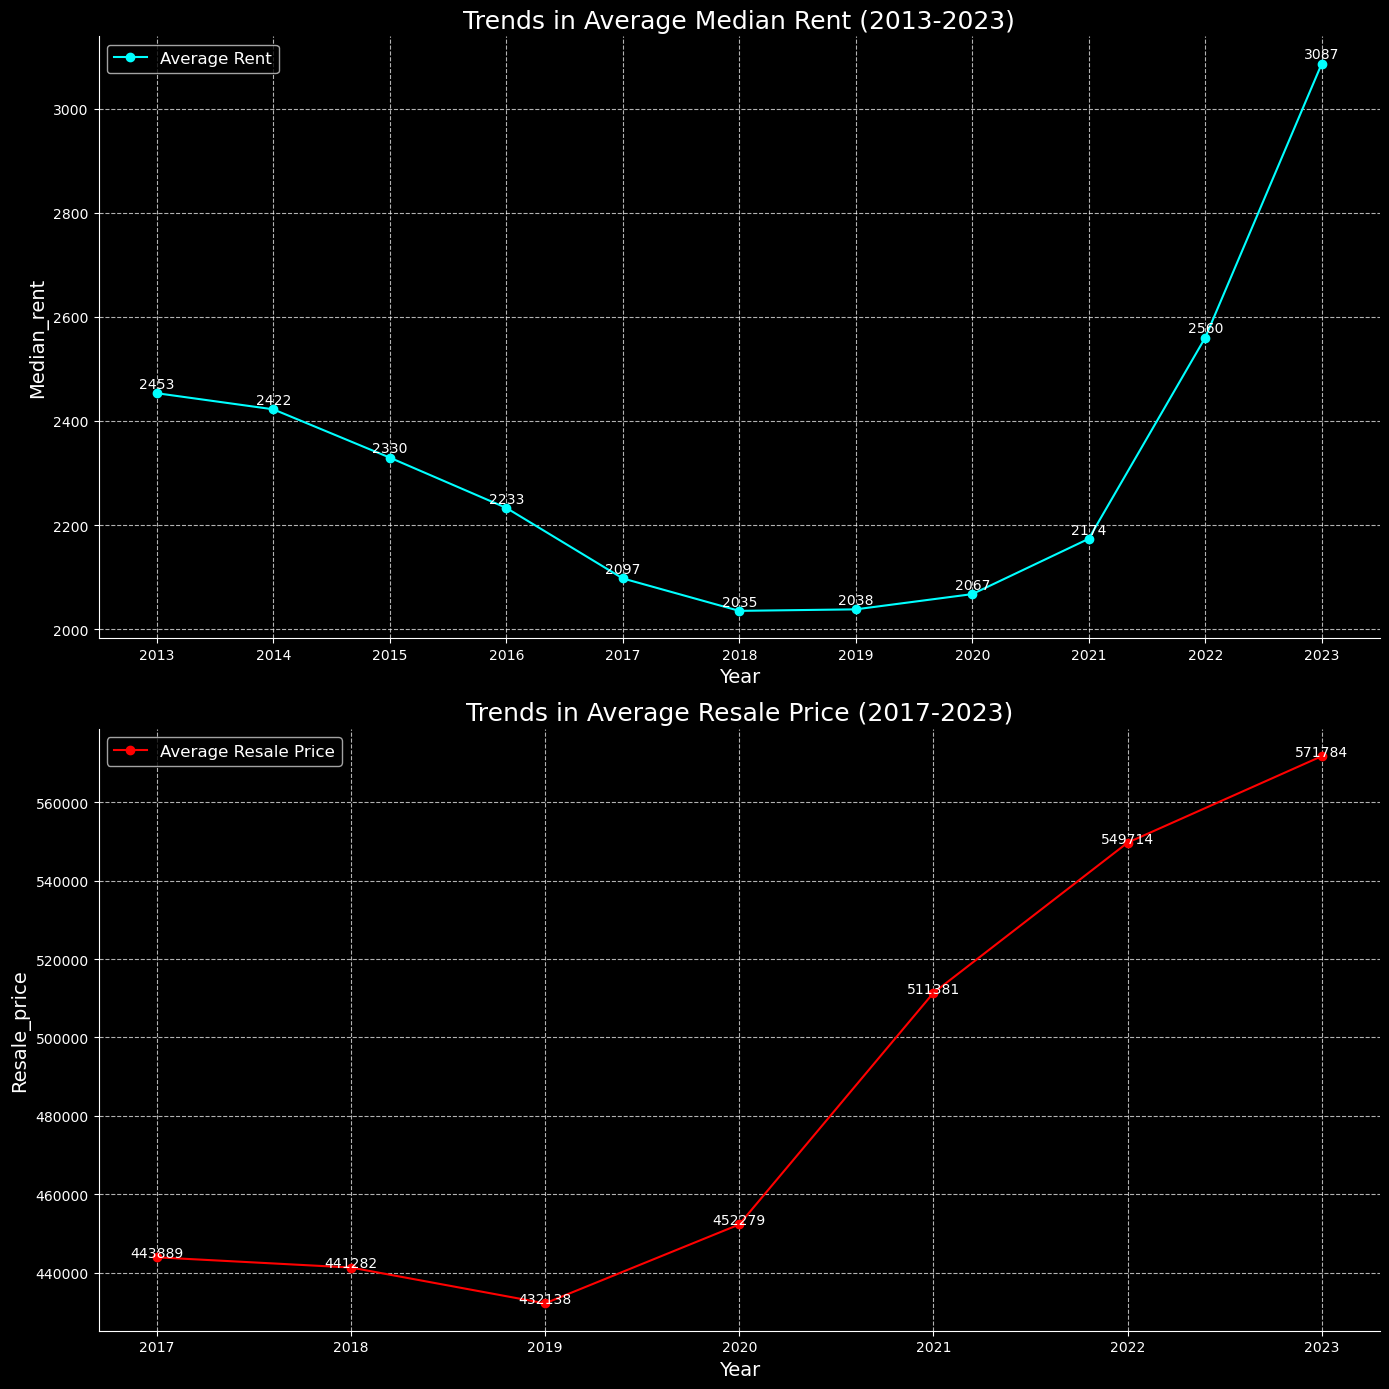

In [89]:
# Function to plot line chart
def plot_linechart(ax, data, x_col, y_col, title, color, label):
    ax.plot(data[x_col], data[y_col], marker='o', color=color, label=label)

    # Style the plot
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(y_col.capitalize(), fontsize=14)
    ax.legend(loc='upper left', fontsize=12)

    # Adding grid lines and removing spines 
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate points with the exact values for better clarity
    for line in range(0, len(data)):
        if data[y_col][line] != 0:  # Check if median_rent is not zero
            ax.text(data[x_col][line], data[y_col][line] + 10,
                    f'{data[y_col][line]:.0f}', ha='center', fontsize=10, color='white')

# Prepare data For Average Rent
rent_filtered = rent[(rent['quarter'].astype(int) >= 2013) & (rent['quarter'].astype(int) <= 2023)]
rent_filtered = rent_filtered[rent_filtered['median_rent'] != 0]
average_rent_over_years = rent_filtered.groupby('quarter')['median_rent'].mean().reset_index()

# Prepare data For Average Resale Price
resale['month'] = pd.to_datetime(resale['month'])
resale_filtered = resale[(resale['month'].dt.year >= 2017) & (resale['month'].dt.year <= 2023)].copy()
resale_filtered = resale_filtered[resale_filtered['resale_price'] != 0]
resale_filtered.loc[:, 'year'] = resale_filtered['month'].dt.year
average_resale_over_years = resale_filtered.groupby('year')['resale_price'].mean().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 14))

# Average Rent subplot
plot_linechart(axs[0], average_rent_over_years, 'quarter', 'median_rent', 'Trends in Average Median Rent (2013-2023)',
               'cyan', 'Average Rent')

# Average Resale Price subplot
plot_linechart(axs[1], average_resale_over_years, 'year', 'resale_price', 'Trends in Average Resale Price (2017-2023)',
               'red', 'Average Resale Price')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


# Graph 1 Analysis

The two graphs show the trends in average median rent from 2013 to 2023 and average resale price from 2017 to 2023.

Average median rent: From the graph shown,  we can see that there is decreasing trend from SGD 2453 in 2013 to SGD 2035 in 2018. 

Next, there is increasing trend from SGD 2035 in 2018 to SGD 2174 in 2021.Lastly, there is steep increasing trend from SGD 2174 in 2021 to SGD 3087 in 2023. This means that there is fluctuations in the average median rent from 2013 to 2023. 

Average median resale price: From the graph, we can see that there is a small drop in resale price from SGD 443889 in 2017 to SGD 432138 in 2019. However, there is also an increasing trend from SGD 432138 in 2019 to  SGD 571784 in 2023. Overall, average median rent has increasing trend from 2017 to 2023

However, if we see from the same timeline starting from 2017 to 2023, both average median rent and average resale price have the similar increasing trends. This could be due to inflation that is happening in Singapore which increase the price of the property or it may be because of COVID period. 

#  Graph 2 : Average amenities per block in each town  (Bar Chart)

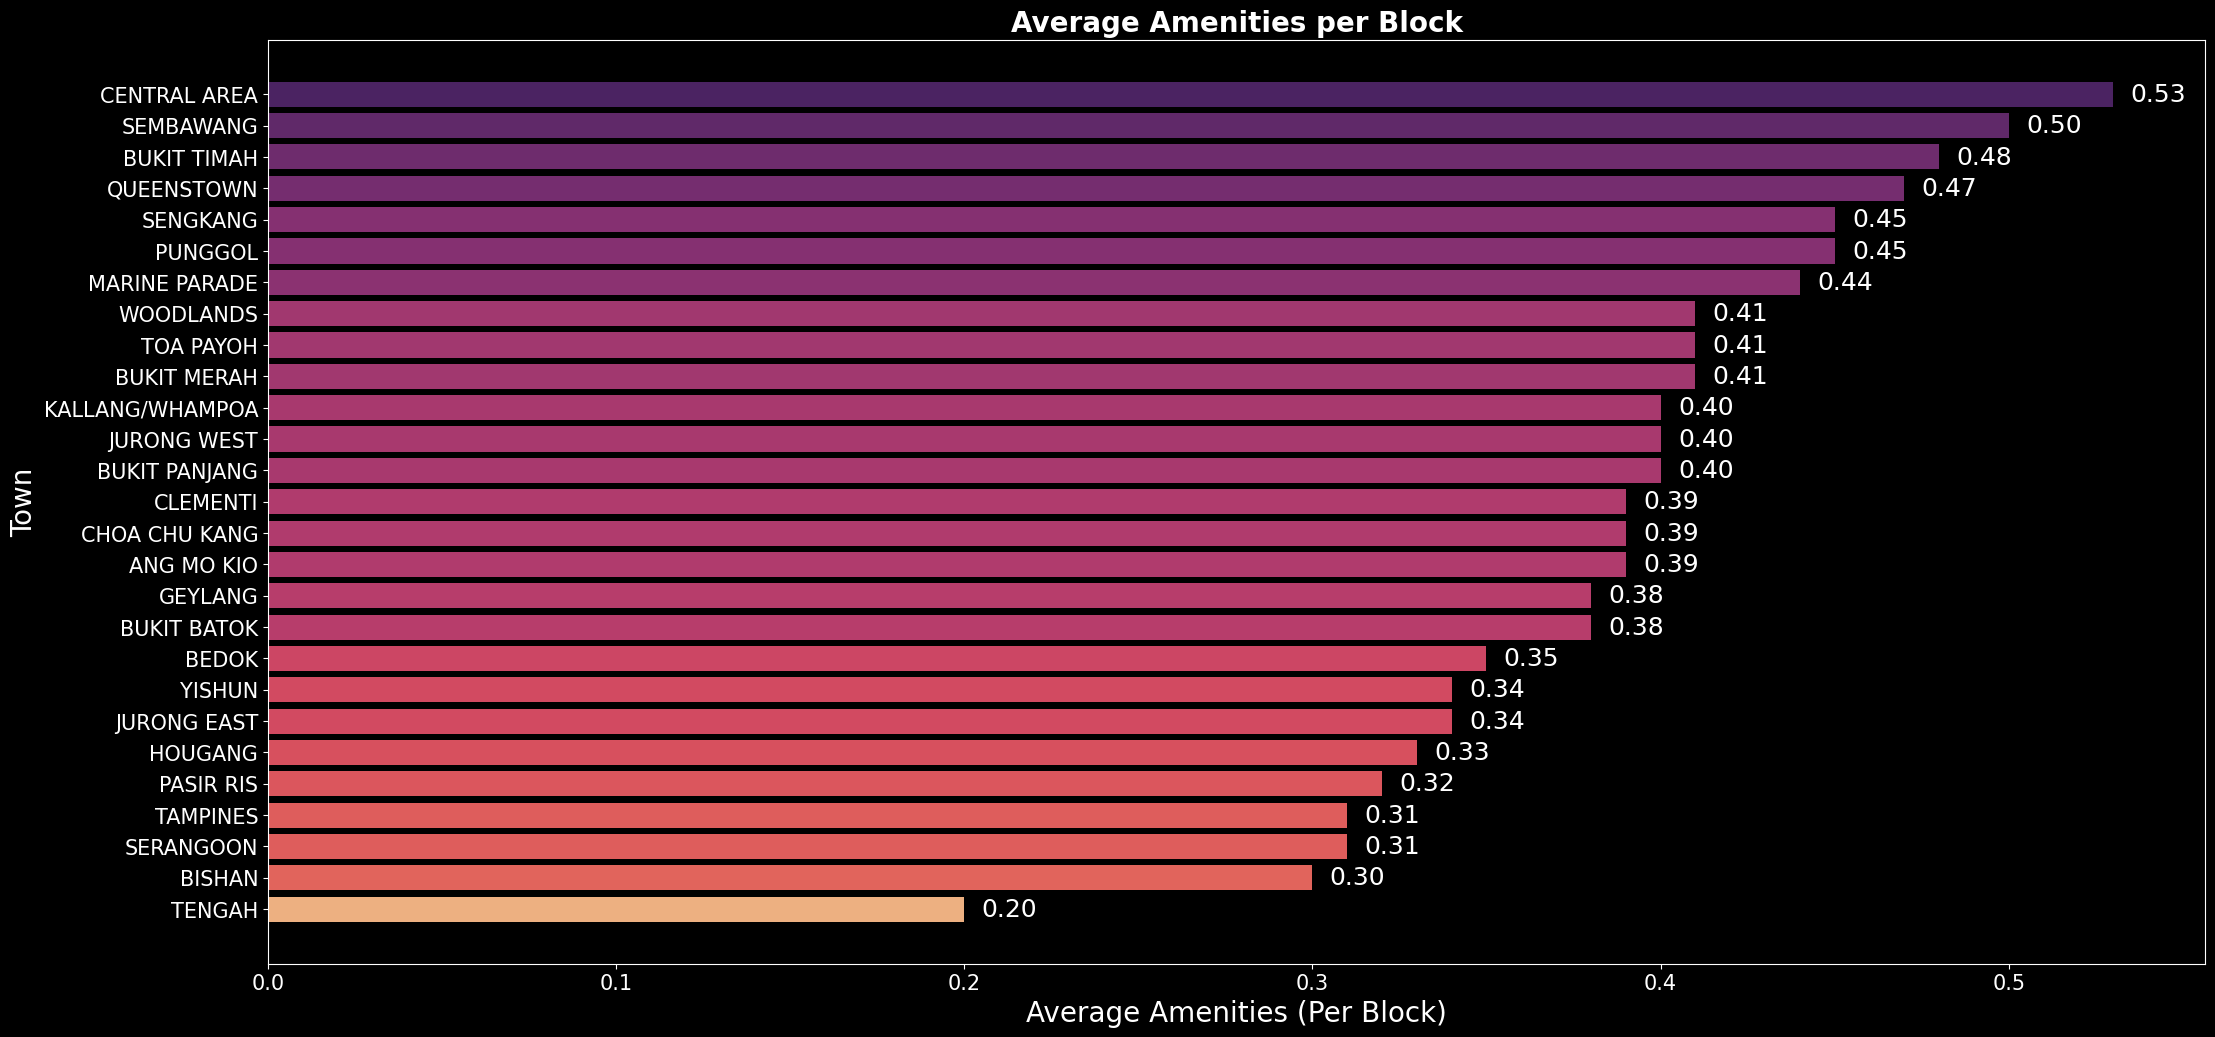

In [90]:
# Sort town names based on the average amenities values in descending order
sorted_town_names = [town for town, avg_amen in sorted(average_amen.items(), key=lambda x: x[1], reverse=False)]

# Colouring
cmap = plt.get_cmap('flare')
norm = Normalize(vmin=min(average_amen.values()), vmax=max(average_amen.values()))

# Setting the color of the bar chart using the "flare" colormap
colors = [cmap(norm(average_amen[town])) for town in sorted_town_names]

# Create a horizontal bar chart
plt.figure(figsize=(25, 12))

# Plotting the horizontal bar chart 
bars = plt.barh([town[town_abbr] for town_abbr in sorted_town_names], [average_amen[town] for town in sorted_town_names], color=colors)

# Style the plot
plt.title("Average Amenities per Block", fontsize=20, fontweight='bold')
plt.xlabel("Average Amenities (Per Block)",fontsize=20)
plt.ylabel("Town",fontsize=20)

# Add exact values on the bars
for i in range(len(bars)):
    bar = bars[i]
    value = average_amen[sorted_town_names[i]]
    town_abbr = sorted_town_names[i]
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', fontsize=18)

    
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.show()

# Graph 2 Analysis

The graph shows the average amenities per block in each town. It will tell us the average number of amenities in each block per town. Since I am looking for a place with many amenities around, the higher the value the more amenities in the area and in this case we can see that the highest average amenities is central area which is on 0.53. In our analysis, we will take top 5 of the towns to further analyse again. 

The towns we select are Central area, Sembawang, Bukit Timah, Queenstown and Sengkang.

Average amenities per block = total number of amenities in all blocks / total number of blocks in a town

# Graph 3 : Resale Price vs Remaining Lease Year Over Four Years(Scatter plot)

One thing that I consider when I buy a flat is the remaining lease year. So I Wonder whether the remaining lease affects the resale price of a flat. Here in the analysis, We are going to compare 4 years (2020,2021,2022,2023)

In this analysis we only take sample of January since I am going to move in January 2024 and it is good to know the trend of resale price and remaining lease for every year in January

Correlation coefficient (R-value) for 2020 - January: 0.30509
Correlation coefficient (R-value) for 2021 - January: 0.31891
Correlation coefficient (R-value) for 2022 - January: 0.36759
Correlation coefficient (R-value) for 2023 - January: 0.38113


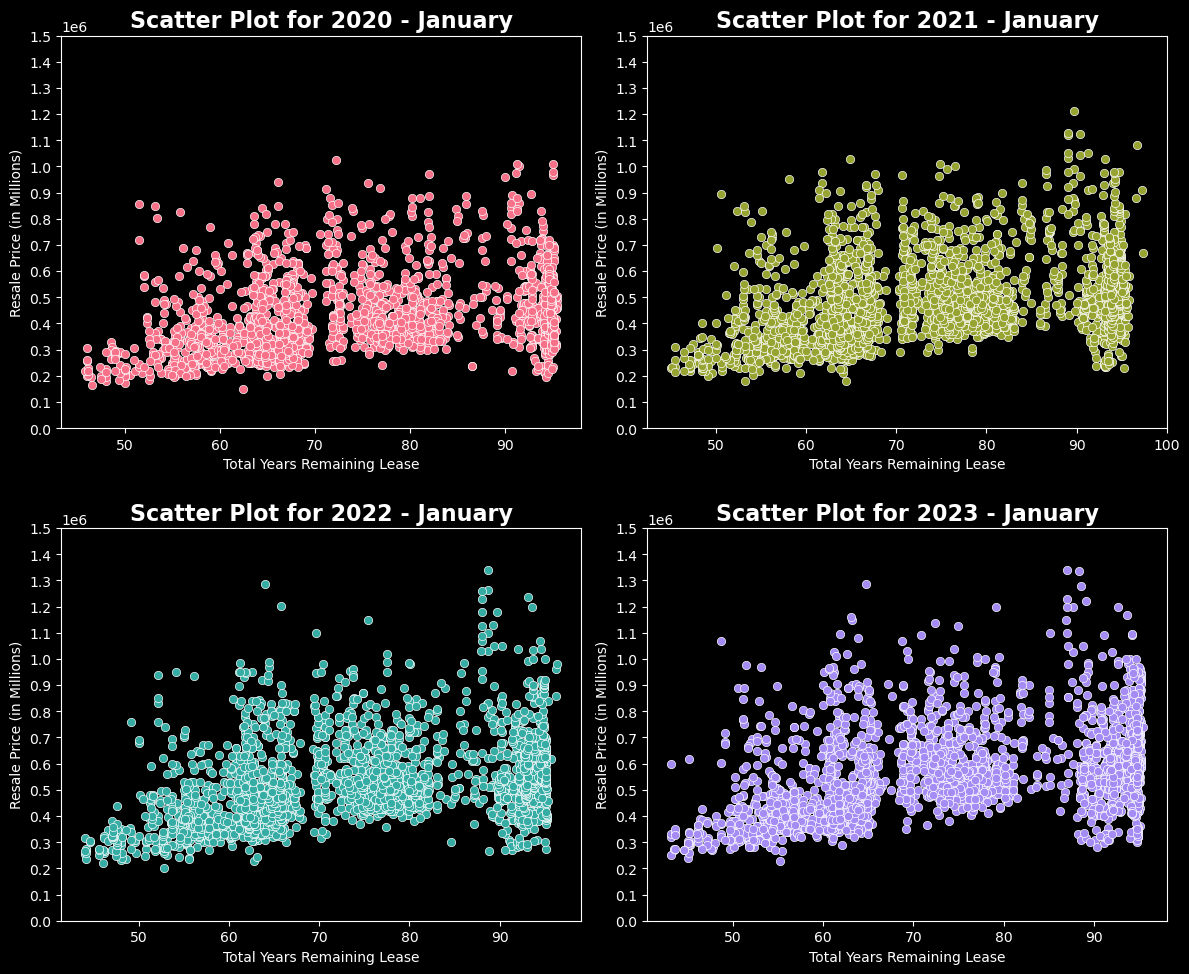

In [91]:
# Convert month
resale['month_converted'] = pd.to_datetime(resale['month'])

# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define a color palette
color_palette = sns.color_palette("husl", n_colors=4)

# Define y-axis ticks
y_ticks_resale = np.arange(0, resale['resale_price'].max() + 10000, 100000)

# Function to convert years
def convert_to_years(row):
    # Extract years and months from the row
    years_str = row[0]
    months_str = row[2]
    
    # Convert years string to integer
    years = int(years_str)

    # Convert months string to integer or set it to 0 if None
    months = int(months_str) if months_str is not None else 0

    # Convert months to years
    total_years = years + (months / 12)

    return round(total_years, 1)
    
        
# Filter data for the first month of each year
for i, year in enumerate([2020,2021,2022,2023]):
    resale_year_month = resale.loc[(resale['month_converted'].dt.year == year) & (resale['month_converted'].dt.month == 1)].copy()

    # Split the 'remaining_lease' column
    array = resale_year_month['remaining_lease'].str.split(expand=True)

    # Apply the function to create a new 'total_years'
    resale_year_month['total_years'] = array.apply(convert_to_years, axis=1)

    # Plot scatter plot on the corresponding subplot with color palette
    sns.scatterplot(x=resale_year_month['total_years'], y=resale_year_month['resale_price'], ax=axs[i // 2, i % 2], color=color_palette[i])
    axs[i // 2, i % 2].set_xlabel('Total Years Remaining Lease')
    axs[i // 2, i % 2].set_ylabel('Resale Price (in Millions)')
    axs[i // 2, i % 2].set_title(f'Scatter Plot for {year} - January', fontsize = 16 , fontweight = 'bold')
    axs[i // 2, i % 2].set_yticks(y_ticks_resale)
    
     # Calculate correlation coefficient
    r_value, _ = pearsonr(resale_year_month['total_years'], resale_year_month['resale_price'])
    print(f'Correlation coefficient (R-value) for {year} - January: {r_value:.5f}')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Graph 3 Analysis

The graph is showing the relationship between the remaining lease and resale price in 4 different years. 
From the graph shown above, we can see that there are not much changes in the scatter plot by the year which means that they have the same trend over four years. In addition , the r value (the correlation coefficient) is about 0.3 which shows weak relationship between resale price and remaining lease. Therefore, It can be concluded that the remaining lease year and resale price have same trend over the years and remaining lease year has weak-association or has small effect on the resale price over four years. 

# Graph 4 : Comparison of total price after 10 years, Buying vs Renting (Bar Graph and line chart)

Since we want to predict the total price of buying vs renting after 10 years, we need to find both average annual increase in median rent and resale price. 

Average Annual Increase in Rent: 2.68%
Average Annual Increase in Resale Price: 4.43%

Year	Cumulative Rent (Annual)
2024	38030.15
2025	77078.87
2026	117173.45
2027	158341.90
2028	200612.98
2029	244016.23
2030	288581.96
2031	334341.32
2032	381326.26
2033	429569.62
2034	479105.11

 Estimated Resale Price for 2024 is 597114.40


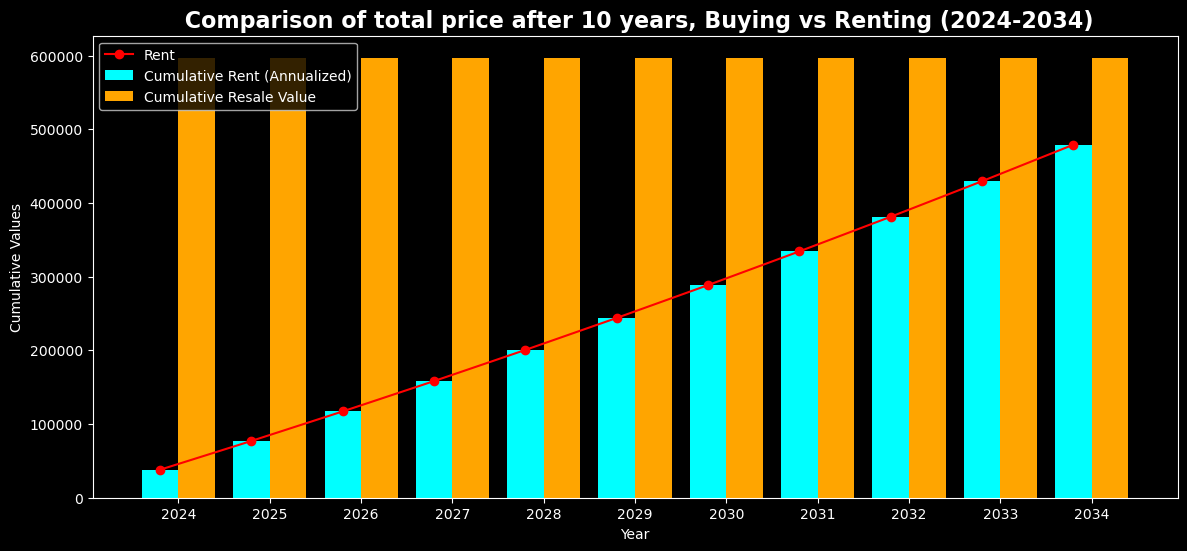

In [92]:
#Years from 2024 to 2034
years = [2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034]
    
# Calculate and print average annual increase for Average Rent
rent_increase = average_rent_over_years['median_rent'].pct_change().mean() * 100
print(f'Average Annual Increase in Rent: {rent_increase:.2f}%')

# Calculate and print average annual increase for Average Resale Price
resale_increase = average_resale_over_years['resale_price'].pct_change().mean() * 100
print(f'Average Annual Increase in Resale Price: {resale_increase:.2f}%')



# Calculate rent values for 2024 to 2034
rent_values = [average_rent_over_years['median_rent'].iloc[-1] * (1 + rent_increase / 100) ** (year - 2023) for year in years]

# Calculate cumulative sum of rent values
cumulative_rent_values = pd.Series(rent_values).cumsum()

# Multiply by 12 to get annualized values (assuming rent is for 12 months)
annualized_cumulative_rent_values = cumulative_rent_values * 12


# Calculate resale values for 2024 to 2034
resale_values = [average_resale_over_years['resale_price'].iloc[-1] * (1 + resale_increase / 100)]


# Print the results 
print("\nYear\tCumulative Rent (Annual)")
for i in range(len(years)):
    year = years[i]
    rent_value = annualized_cumulative_rent_values[i]
    print(f"{year}\t{rent_value:.2f}")
    
print(f'\n Estimated Resale Price for 2024 is {resale_values[0]:.2f}') 


#Change annual cum rent to list
annual_cumsum_list = annualized_cumulative_rent_values.tolist()

#making value for x ticks
x_axis = np.arange(len(years))

# Create a bar chart for cumulative rent and constant resale values
plt.figure(figsize=(14, 6))

# Bar chart for Cumulative Rent Values
plt.bar(x_axis + 0.2, annual_cumsum_list , width=0.4, color='cyan', label='Cumulative Rent (Annualized)')

# Bar chart for Constant Cumulative Resale Value
plt.bar(x_axis + 0.6, [resale_values[0]] * len(years), width=0.4, color='orange', label='Cumulative Resale Value') 

# Line chart for Cumulative Rent Values
plt.plot(x_axis + 0.2, annual_cumsum_list, marker='o', linestyle='-', color='red', label='Rent')

plt.xlabel('Year')
plt.ylabel('Cumulative Values')
plt.title(' Comparison of total price after 10 years, Buying vs Renting (2024-2034)' ,fontsize = 16 , fontweight = 'bold')
plt.xticks(x_axis+0.4, years)
plt.legend()
plt.show() 

# Graph 4 Analysis

NOTE: THE YELLOW BAR CHAR DOES NOT MEAN BUYING A FLAT EVERY YEAR, IT JUST FOR COMPARISON FOR THE TOTAL PRICE IF I BUY FLAT IN 2024 AND IF I RENT OVER 10 YEARS

In this graph, we are trying to compare two possible scenarios to answer the question that I have to find out which is "is it more worth it to buy or rent if I only live in Singapore for about 10 years?". 

From our calculation, we get the Average Annual Increase in Rent of 2.68% , Average Annual Increase in Resale Price of 4.43%.

We also find the cumultative rent for 10 years(this will be used to compare if i decide to rent) and the estimated resale price of flat in 2024 (this will be used to compare if i decide to buy flat in 2024). 

Since I am planning to move in January 2024, if i decide to buy a flat, then the price that i have to pay is the estimated resale price in 2024 which is SGD 597114.40. I have to pay a huge amount of money in the beginning but I do not need to pay anything in the future (assuming we don't include tax and never take installment) 

However, if I decide to take rent, I have to pay rent price every month and assuming every year the price increase from the trend we see in our line chart. From the graph that we have plotted, we can see the comparison of total price for rent after 10 years is actually lower than buying a flat.

Therefore, we can conclude that it is more worth for me to rent a flat if i stay for about 10 years in Singapore.

# Graph 5 : Distribution of median rent prices across different towns in 2023 (boxplot)

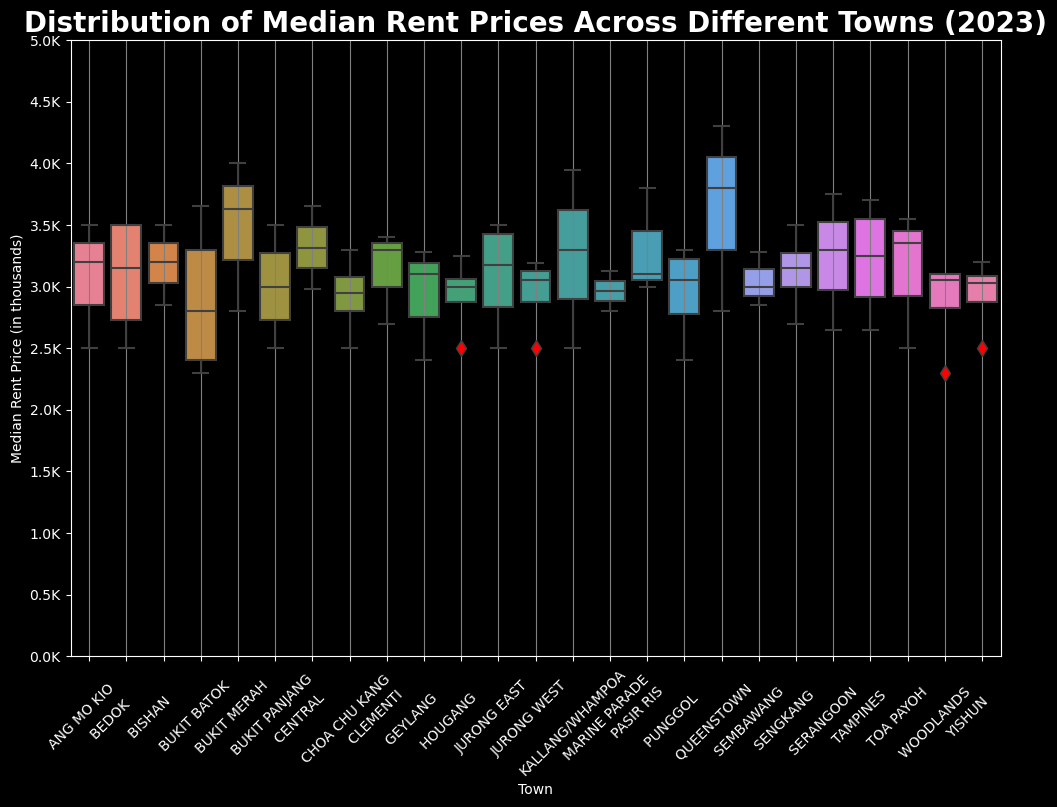

In [93]:
# Filter the data for median rent prices for the year 2023, exclude rows where 'median_rent' is 0
rent_filtered = rent[(rent['quarter'].str.contains('^2023')) & (rent['median_rent'] != 0)]

# Set up the subplot
fig, axes = plt.subplots(figsize=(12, 8))

# Subplot for median rent prices
sns.boxplot(x='town', y='median_rent', data=rent_filtered, palette='husl', whis=1.5,
            flierprops=dict(markerfacecolor='red', markersize=8), showfliers=True)
axes.set_title('Distribution of Median Rent Prices Across Different Towns (2023)', fontweight='bold', fontsize=20)
axes.set_xlabel('Town')
axes.set_ylabel('Median Rent Price (in thousands)')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
y_ticks_rent = range(0, int(rent_filtered['median_rent'].max()) + 1000, 500)
axes.set_yticks(y_ticks_rent)
axes.set_yticklabels([f'{tick/1000}K' for tick in y_ticks_rent])
axes.grid(axis='x',color='grey')
plt.show()


# Graph 5 Analysis

THE TOP 5 TOWNS : 'CENTRAL', 'SEMBAWANG', 'BUKIT TIMAH', 'QUEENSTOWN', 'SENGKANG'

In graph 4 analysis, we find out that it is more worth it to rent a flat. Now in this part, we will further analyse the best location in terms of media rent prices in 2023

From the graph, if we compare the top 5 towns that we get from analysing graph 2, we can see that there are no rent units in Bukit Timah, so we remove it from out analysis. Central and Queenstown have quite high average median rent compared to other towns. Central has narrow range which means that the median price is more consistent. Queenstown has wide range which means that the median price is more various. On the other hand, Sengkang and Sembawang have comparatively low average median rent. They also have quite narrow range which means that the median price is more consistent. 

From our analysis, since i want to find the a flat that have lots of amenities with decent price and location, I decide to choose Central Area and Sembawang. This is because Central Area and Sembawang are the top 2 towns that have the best amenities. Even though the median price in Central Area is quite high compared to other towns,it has the most number of average amenities and it is located in central which is very strategic and near to working area and also the price there is quite consistent since it has narrow range. Sembawang is the second town that has highest average amenities. It also has comparatively low median rent prices with the scenic wonders and recreational activities that it offers. Queenstown have the widest range and interquartile range among the four towns and hence the median prices there are least consistent. Sengkang has least amount of amenities for the price offered. It is also placed in fourth place in term of amenities considering the prices. It is also quite far from everything including working area. 



# Graph 6 : Distribution of dwelling units by sold/rental and flat types in central area and sembawang in 2021 (Pie Chart)

Since the data only provides until 2021, we only use the dwelling unit in 2021

In [94]:
# Function to create donut chart
def create_donut_chart(data, title, labels, colors, text_color, text_title, ax, legend_title, is_flat_type=False , explode = None):
    wedges, texts, autotexts = ax.pie(
        data['no_of_dwelling_units'],
        labels=data[labels],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.3),
        colors=sns.color_palette(colors),
        textprops= {'fontsize': 4, 'color': 'black'},
        explode = explode
    )

    ax.set_title(title, fontsize=18, y=1.1, fontweight='bold', color='white')
    ax.text(0, 0, text_title, fontsize=15, fontweight='bold', ha='center', va='center', color='white')

    annotation = data[labels] + ": " + data['no_of_dwelling_units'].astype(str) + " units"
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    total = sum(data['no_of_dwelling_units'])
    
    # Annotation
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        percentage = (data['no_of_dwelling_units'].iloc[i] / total) * 100

        # Adjust the annotation position based on flat type
        if data[labels].iloc[i] in ['Studio Apartment']:
            annotation_position = (1.55 * np.sign(x), 1.4 * y)
        elif data[labels].iloc[i] in ['2-room']:
            annotation_position = (1.55 * np.sign(x), 1 * y)
        elif data[labels].iloc[i] in ['Executive']:
            annotation_position = (1.55 * np.sign(x), 1.6 * y)
        else:
            annotation_position = (1.55 * np.sign(x), 1.2 * y)

        ax.annotate(f"{annotation[i]}\n{percentage:.1f}%", xy=(x, y), xytext=annotation_position,
                    horizontalalignment=horizontalalignment, **kw, color=text_color, fontweight='bold')

    if is_flat_type:
        # Add a legend for flat_type with individual labels
        plt.legend(data[labels], title=legend_title, loc='upper right', bbox_to_anchor=(1.7, 0.8), fontsize=12)
    else:
        # Add a legend based on colors for sold_or_rental
        legend_labels = data[labels].unique()
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color
                          in sns.color_palette(colors)]
        plt.legend(legend_handles, legend_labels, title=legend_title, loc='center', bbox_to_anchor=(1.3, 0.7))


# Function to prepare data for specific area
def prepare_data_by_area(dwelling, area, exclude_flat_types=None):
    dwelling['no_of_dwelling_units'] = pd.to_numeric(dwelling['no_of_dwelling_units'], errors='coerce')
    dwelling_filtered = dwelling[(dwelling['financial_year'] == 2021) & (dwelling['town_or_estate'] == area)]

    # Exclude specific flat types 
    if exclude_flat_types:
        dwelling_filtered = dwelling_filtered[~dwelling_filtered['flat_type'].isin(exclude_flat_types)]

    grouped_data = dwelling_filtered.groupby(['sold_or_rental', 'flat_type'])['no_of_dwelling_units'].sum().reset_index()
    first_chart = dwelling_filtered.groupby('sold_or_rental')['no_of_dwelling_units'].sum().reset_index()
    second_chart = grouped_data.groupby('flat_type')['no_of_dwelling_units'].sum().reset_index()
    return first_chart, second_chart


# Calling prepare_data_by_area function for sembawang and Central (excluding Studio Apartment and Executive)
first_chart_sembawang, second_chart_sembawang= prepare_data_by_area(dwelling, 'Sembawang')

exclude_flat_types_central = ['Studio Apartment', 'Executive']
first_chart_central, second_chart_central = prepare_data_by_area(dwelling, 'Central Area',
                                                                 exclude_flat_types_central)


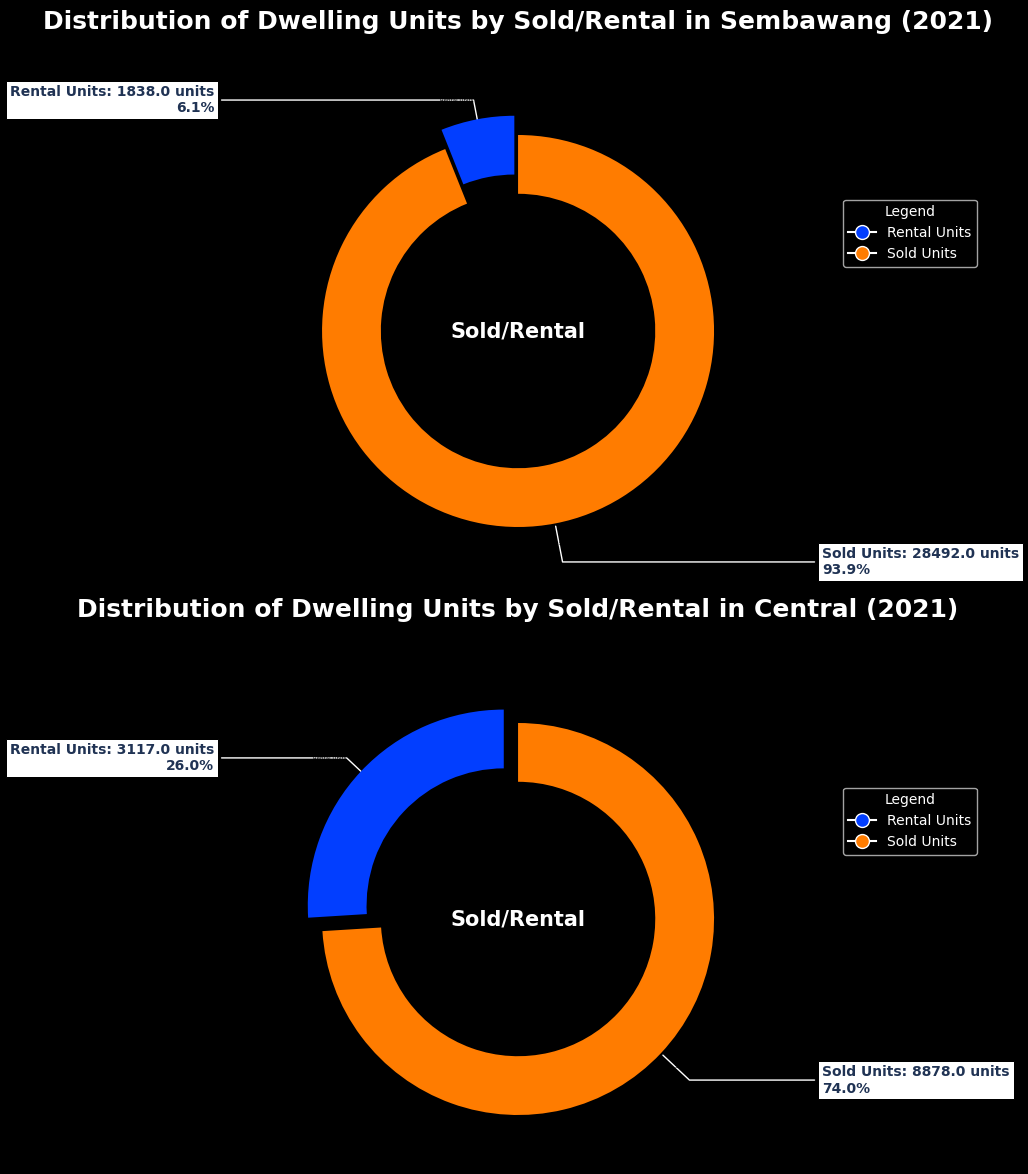

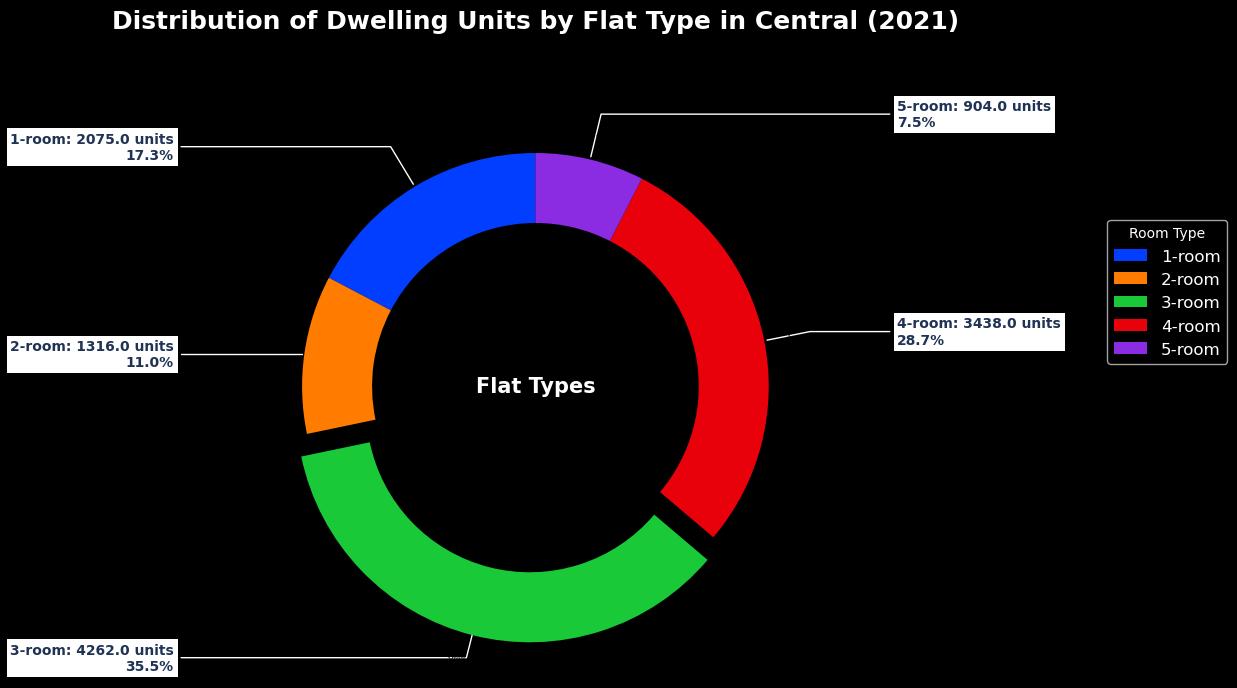

In [95]:
# Create subplots for 'sembawang- Sold/Rent' and 'Central - Sold/Rent'
plt.figure(figsize=(20, 14))

rent_sold_explode = (0.1,0)
# Loop through the data for each region
for i, (data, title, labels, colors, text_color, text_title, legend_title, is_flat_type) in enumerate([
        (first_chart_sembawang, 'Distribution of Dwelling Units by Sold/Rental in Sembawang (2021)', 'sold_or_rental', 'bright', '#203354', 'Sold/Rental', 'Legend', False),
        (first_chart_central, 'Distribution of Dwelling Units by Sold/Rental in Central (2021)', 'sold_or_rental', 'bright', '#203354', 'Sold/Rental', 'Legend', False)
    ]):
    # Create subplots with 2 rows and 1 column
    plt.subplot(2, 1, i + 1)
    
    # Call the function to create the donut chart
    create_donut_chart(data, title, labels, colors, text_color, text_title, plt.gca(), legend_title, is_flat_type,rent_sold_explode)

flat_type_explode = (0,0, 0.1, 0,0)
# Create subplots for 'Central - Flat Type'
plt.figure(figsize=(20, 14))

for i, (data, title, labels, colors, text_color, text_title, legend_title, is_flat_type) in enumerate([
        (second_chart_central, 'Distribution of Dwelling Units by Flat Type in Central (2021)', 'flat_type', 'bright', '#203354', 'Flat Types', 'Room Type', True)
    ]):
    plt.subplot(2, 1, i + 1)
    create_donut_chart(data, title, labels, colors, text_color, text_title, plt.gca(), legend_title, is_flat_type,flat_type_explode)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show() 


# Graph 6 Analysis 

From the analysis we get in graph 5, we get Central Area and Sembawang. From the graph of distribution of dwelling unit by sold/rental, we can see that there are more rental unit in central area (3117 units,26%) than in Sembawang (1838 units,6.1%).

From graph 4 since it is more worth it to rent in the long run, Central Area has more rent units. 

Lastly, we need to decide the flat type that is suitable for me and my brother. From graph Distribution of Dwelling Units by Flat Type in Central, we can see that the unit that has the most availability is 3-room (4262 units,35.5%) followed by 4-room (3438 units,28.7%).

Hence since there are only two people staying, 3-room is the most suitable since my brother and I can have our own room and one living room and it has the most availability in central area. 

# Summary

In Summary, from the analysis that we did, it is better for me to rent a flat if I want to live for about 10 years in Singapore. 

The best location is Central Area because even though it has relatively high median rent price , it has the highest average number of amenities and strategic location which allows me to go anywhere (especially working area) easily which is in line with my criteria.

Lastly, the most suitable room is 3-room since it has the most availability in central area and my brother and I can have our own room. 

THANK YOU!!